In [2]:
from sklearn.cluster import KMeans


In [14]:
# Import all needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [15]:
# Load the dataset
df = pd.read_csv("global-data-on-sustainable-energy (1).csv")

In [16]:
# Clean column names
df.columns = df.columns.str.replace('\n', ' ').str.replace('\r', ' ').str.strip()

In [17]:
# Drop non-numeric/identifier columns
df_cluster = df.drop(columns=["Entity", "Year", "Density\\n(P/Km2)"], errors='ignore')

In [18]:
# Drop rows with missing values
df_cluster = df_cluster.dropna()

In [19]:
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

In [20]:
# Apply KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

C:\Users\Tanishka Bhojne\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [21]:
# Add cluster labels to DataFrame
df_cluster['Cluster'] = clusters

In [22]:
# PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df_cluster['PCA1'] = pca_data[:, 0]
df_cluster['PCA2'] = pca_data[:, 1]

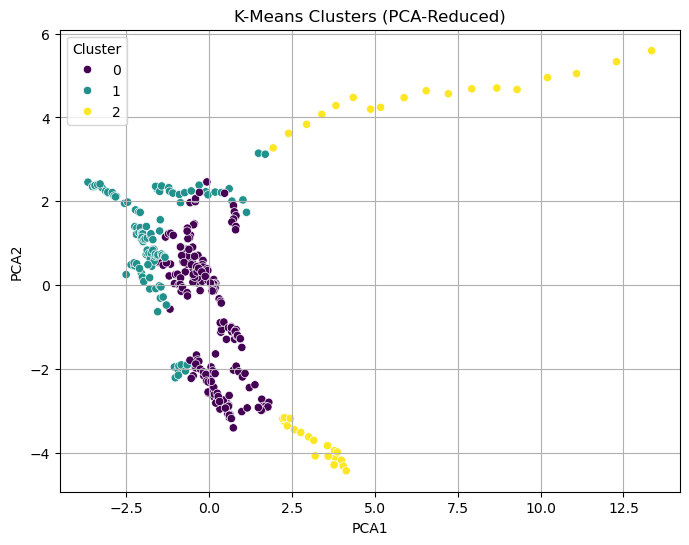

In [23]:
# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cluster, x='PCA1', y='PCA2', hue='Cluster', palette='viridis')
plt.title('K-Means Clusters (PCA-Reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()
